In [21]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [60]:
blk=pd.read_csv("E:/imarticus/excels/Black friday.csv")
blk.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [61]:
blk = blk.astype({"Occupation": str}, errors='ignore') 
blk = blk.astype({"Product_Category_1": str}, errors='ignore')
blk = blk.astype({"Marital_Status": str}, errors='ignore')

In [62]:
blk.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [63]:
blk.shape

(550068, 12)

In [64]:
blk.Gender.describe()

count     550068
unique         2
top            M
freq      414259
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

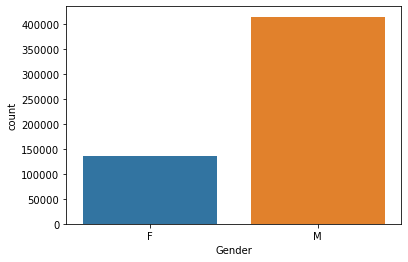

In [65]:
sns.countplot(x="Gender",data=blk)

In [66]:
blk.Age.describe()

count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [67]:
blk.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

<AxesSubplot:xlabel='Age', ylabel='count'>

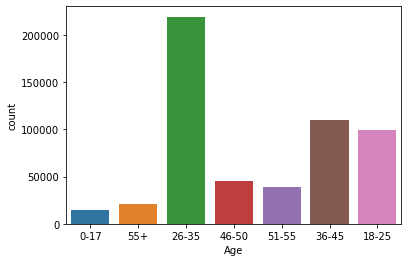

In [68]:
sns.countplot(x="Age",data=blk)

In [69]:
blk.Occupation.describe()

count     550068
unique        21
top            4
freq       72308
Name: Occupation, dtype: object

In [70]:
blk.Occupation.nunique()

21

<AxesSubplot:xlabel='Occupation', ylabel='count'>

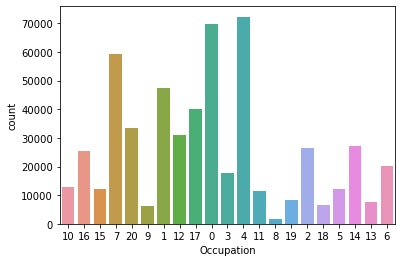

In [71]:
sns.countplot(x="Occupation",data=blk)

In [72]:
blk.City_Category.describe()

count     550068
unique         3
top            B
freq      231173
Name: City_Category, dtype: object

In [73]:
blk.City_Category.nunique()

3

<AxesSubplot:xlabel='City_Category', ylabel='count'>

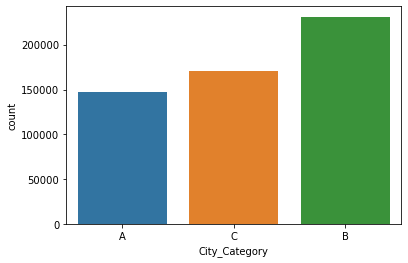

In [74]:
sns.countplot(x="City_Category",data=blk)

In [75]:
blk.Stay_In_Current_City_Years.describe()

count     550068
unique         5
top            1
freq      193821
Name: Stay_In_Current_City_Years, dtype: object

In [76]:
blk.Stay_In_Current_City_Years.nunique()

5

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

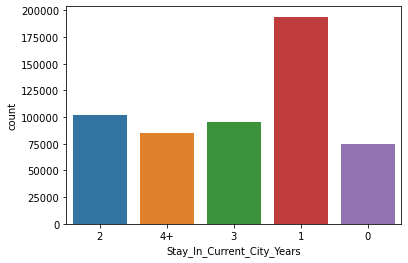

In [77]:
sns.countplot(x="Stay_In_Current_City_Years",data=blk)

In [78]:
blk.Marital_Status.describe()

count     550068
unique         2
top            0
freq      324731
Name: Marital_Status, dtype: object

In [79]:
blk.Marital_Status.nunique()

2

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

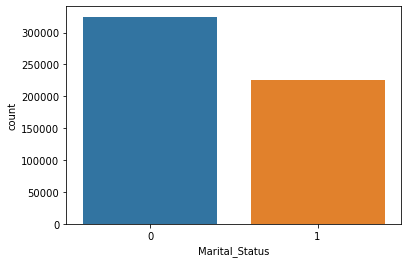

In [80]:
sns.countplot(x="Marital_Status",data=blk)

In [81]:
blk.Product_Category_1.describe()

count     550068
unique        20
top            5
freq      150933
Name: Product_Category_1, dtype: object

In [82]:
blk.Product_Category_1.nunique()

20

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

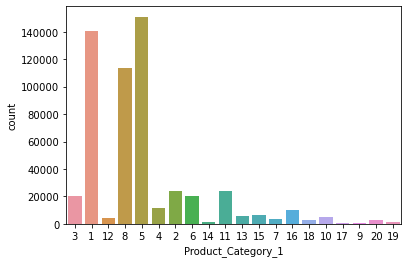

In [83]:
sns.countplot(x="Product_Category_1",data=blk)

In [84]:
blk.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [85]:
blk.Product_Category_2.isnull().sum()

173638

In [86]:
blk.Product_Category_2.nunique()

17

In [87]:
blk.Product_Category_2.fillna("Others",inplace=True)

In [88]:
blk.Product_Category_3.describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [89]:
blk.Product_Category_3.isnull().mean()

0.6967265865311197

In [90]:
blk.drop(["User_ID","Product_ID","Product_Category_3"],axis=1,inplace=True)

In [91]:
blk.shape

(550068, 9)

In [101]:
X=blk[["Purchase","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category_1","Product_Category_2"]]

In [102]:
X.shape

(550068, 9)

In [103]:
X1=pd.get_dummies(X)

In [104]:
X1.shape

(550068, 79)

In [105]:
X1.head(4)

,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,...,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_Others
0,8370,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,15200,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1057,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X1)
scaled_data=scaler.transform(X1)

In [107]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.348992,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.634181,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.058875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.043634,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.332248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


NameError: name 'X1' is not defined

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)

<h2>Linear Regression</h2>

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.6427605893080979
Test Score = 0.6429986699623864


<h2>DecisionTreeRegressor</h2>

In [50]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))

Train Score = 0.741205017708737
Test Score = 0.6125824640462859


<h2>RandomForestRegressor</h2>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

In [ ]:
model2.score(x_train,y_train)

In [ ]:
model2.score(x_test,y_test)

<h2>GradientBoostingRegressor</h2>

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [53]:
model3.score(x_train,y_train)

0.6441080654798994

In [54]:
model3.score(x_test,y_test)

0.6441475606097743

<h2>AdaBoostRegressor</h2>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

In [ ]:
regress.score(x_train,y_train)

In [ ]:
regress.score(x_test,y_test)